In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
city = 'barranquilla'
date = 'jul31'

In [2]:
time = pd.read_csv( './data/meta/time.csv' )

In [3]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [4]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [5]:
time.tail()

,date,time
143,2020-07-04,144
144,2020-07-05,145
145,2020-07-06,146
146,2020-07-07,147
147,2020-07-08,148


In [48]:
filename = ''
if city == 'bogota':
    filename = 'Bogota'
elif city == 'barranquilla':
    filename = 'Barranquilla'
elif city == 'cali':
    filename = 'Cali'
elif city == 'medellin':
    filename = 'Medellin'
elif city == 'cartagena':
    filename = 'Cartagena'
    
meta = pd.read_csv( './data/meta/{}_{}.csv'.format( filename, date ) )

In [49]:
meta.shape

(1400, 11)

In [50]:
meta.dtypes

replicate      int64
time           int64
S            float64
E            float64
A            float64
I1           float64
I2           float64
I3           float64
R            float64
D            float64
obs          float64
dtype: object

In [51]:
meta.tail( 20 )

,replicate,time,S,E,A,I1,I2,I3,R,D,obs
1380,10,120,1.038446e+06,5816.684127,3699.934800,10962.308092,1211.611418,686.072747,160493.712554,1137.378197,1100.0
1381,10,121,1.037678e+06,5457.858672,3481.761333,10315.895412,1167.938301,674.682694,162056.549080,1171.401002,1138.0
1382,10,122,1.036955e+06,5123.193517,3275.782413,9705.613205,1124.462286,662.401285,163530.875102,1204.831609,1171.0
1383,10,123,1.036275e+06,4810.609596,3081.491575,9129.960892,1081.365585,649.326567,164921.407533,1237.627907,1203.0
1384,10,124,1.035634e+06,4518.303608,2898.357225,8587.363449,1038.806186,635.554947,166232.677452,1269.752650,1282.0
1385,10,125,1.035032e+06,4244.694025,2725.837994,8076.216883,996.919604,621.180295,167469.020505,1301.173351,1299.0
1386,10,126,1.034465e+06,3988.380999,2563.393233,7594.919343,955.820752,606.293209,168634.573487,1331.862140,1353.0
1387,10,127,1.033932e+06,3748.114569,2410.490710,7141.893910,915.605776,590.980431,169733.274261,1361.795579,1334.0
1388,10,128,1.033431e+06,3522.769775,2266.611984,6715.604528,876.353846,575.324409,170768.864363,1390.954464,1370.0
1389,10,129,1.032959e+06,3311.327318,2131.255963,6314.566540,838.128872,559.402974,171744.893625,1419.323599,1436.0


In [52]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [53]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [54]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [55]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [56]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
1,1,0.0,0.0,2020-03-14,0.0,0.0
2,2,0.0,0.0,2020-03-15,0.0,0.0
3,3,0.0,0.0,2020-03-16,0.0,0.0
4,4,0.0,0.0,2020-03-17,0.0,0.0
5,5,0.0,0.0,2020-03-18,0.0,0.0


In [57]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
135,135,1563.0,27.474978,2020-07-26,1535.525022,1590.474978
136,136,1587.2,17.939729,2020-07-27,1569.260271,1605.139729
137,137,1596.0,22.597024,2020-07-28,1573.402976,1618.597024
138,138,1650.6,31.136499,2020-07-29,1619.463501,1681.736499
139,139,1666.5,23.868986,2020-07-30,1642.631014,1690.368986


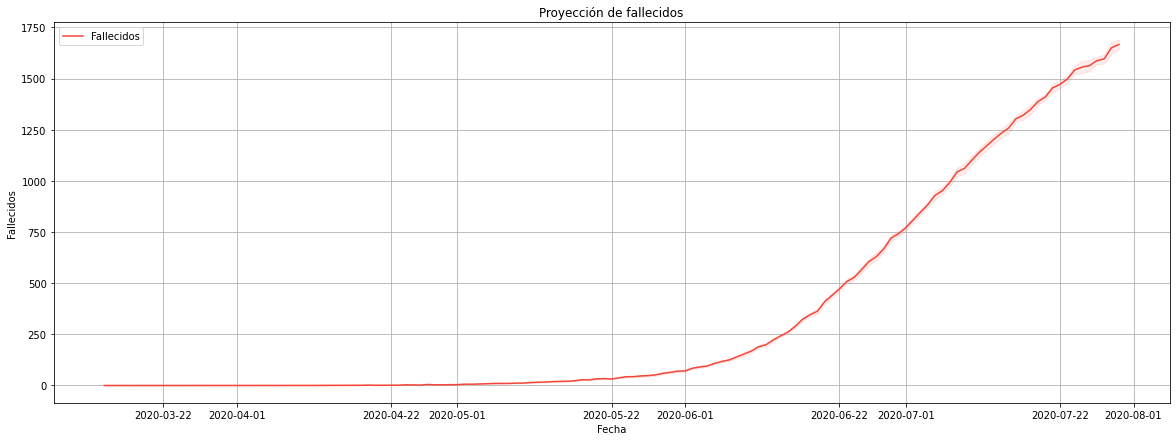

In [58]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [59]:
meta_grouped.to_csv( './data/meta/seir_{}.csv'.format( city ), index = False )